In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df = pd.read_csv('/Users/nguyentrunganhonichan/Documents/Reinforcement_learning/vietstock_nhandinhthitruong_sentiment.csv')
df.head()

,Datetime,news_type,Title,Brief,Sentiment,Negative_Score,Positive_Score,Neutral_Score
0,NHẬN ĐỊNH THỊ TRƯỜNG 45 phút trước,Nhịp đập Thị trường 01/07,"Lực bán thắng thế, VCB ra tay đỡ chỉ số","Trong phiên chiều, VN-Index chứng kiến cú sụp ...",Neutral,0.035652,0.065922,0.898426
1,NHẬN ĐỊNH THỊ TRƯỜNG 30/06 20:00,Thị trường chứng quyền tuần 01/07/2025,Tình hình đang chuyển biến xấu,"Kết thúc phiên giao dịch ngày 30/06/2025, toàn...",Negative,0.988120,0.004117,0.007764
2,NHẬN ĐỊNH THỊ TRƯỜNG 30/06 19:30,Chứng khoán phái sinh ngày 01/07/2025,Triển vọng thị trường vẫn còn tích cực,Các hợp đồng tương lai đồng loạt tăng điểm tro...,Positive,0.009972,0.956125,0.033904
3,NHẬN ĐỊNH THỊ TRƯỜNG 30/06 18:14,Vietstock Daily 01/07/2025,Kỳ vọng thanh khoản phục hồi,VN-Index giữ vững đà tăng đồng thời bám sát Up...,Neutral,0.170720,0.057567,0.771714
4,NHẬN ĐỊNH THỊ TRƯỜNG 30/06 16:37,Nhịp đập Thị trường 30/06,"Khối ngoại quay lại mua ròng, VN-Index ở vùng ...","Kết thúc phiên giao dịch, VN-Index tăng 4.63 đ...",Positive,0.006279,0.880604,0.113117


In [184]:
print(f"columns:\n{df.columns}")
df.info()

columns:
Index(['Datetime', 'news_type', 'Title', 'Brief', 'Sentiment',
       'Negative_Score', 'Positive_Score', 'Neutral_Score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        1049 non-null   object 
 1   news_type       1049 non-null   object 
 2   Title           1049 non-null   object 
 3   Brief           1049 non-null   object 
 4   Sentiment       1049 non-null   object 
 5   Negative_Score  1049 non-null   float64
 6   Positive_Score  1049 non-null   float64
 7   Neutral_Score   1049 non-null   float64
dtypes: float64(3), object(5)
memory usage: 65.7+ KB


Text(0, 0.5, 'total')

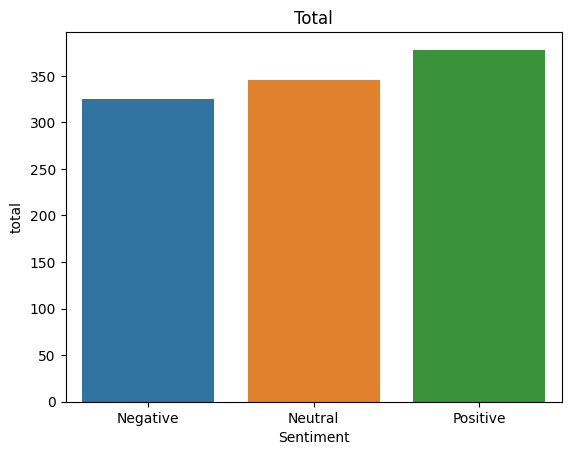

In [185]:
sns.barplot(data=df.groupby('Sentiment').count(), x='Sentiment', y='Title', hue='Sentiment')
plt.title('Total')
plt.ylabel('total')

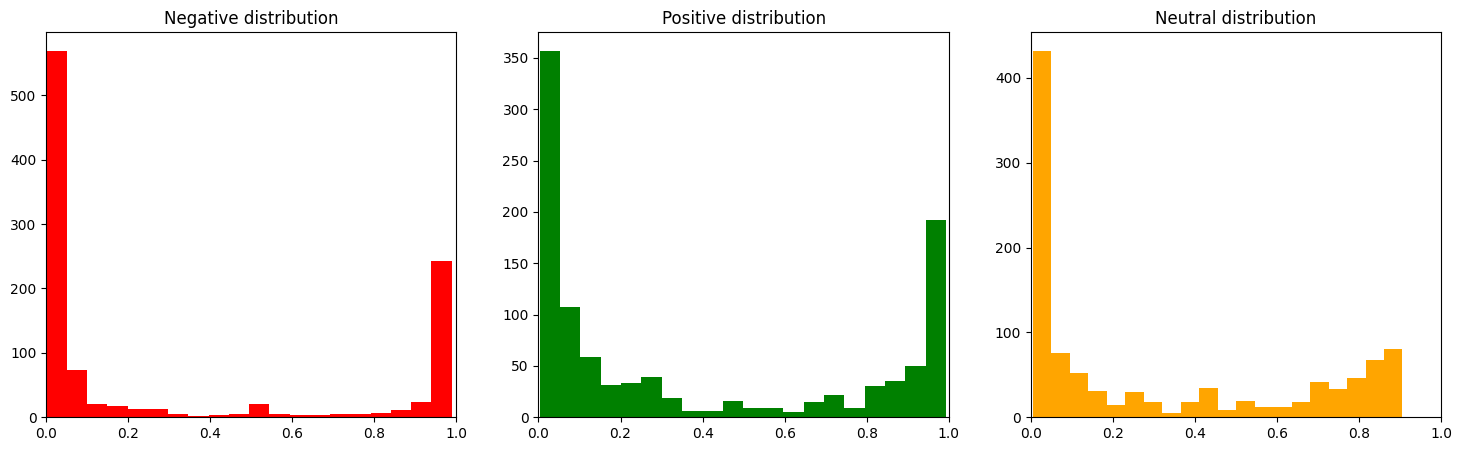

In [186]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Negative distribution
axes[0].hist(df['Negative_Score'], bins=20, color='red')
axes[0].set_title('Negative distribution')
axes[0].set_xlim(0, 1)

# Negative distribution
axes[1].hist(df['Positive_Score'], bins=20, color='green')
axes[1].set_title('Positive distribution')
axes[1].set_xlim(0, 1)

# Negative distribution
axes[2].hist(df['Neutral_Score'], bins=20, color='orange')
axes[2].set_title('Neutral distribution')
axes[2].set_xlim(0, 1)

plt.show()

In [187]:
import re
from datetime import datetime

def extract_date_or_today(text_string: str) -> str:
    """
    Trích xuất ngày tháng (DD/MM) từ một chuỗi.
    - Nếu tìm thấy, nó sẽ trả về ngày đó với năm hiện tại.
    - Nếu không tìm thấy hoặc ngày không hợp lệ (ví dụ: 30/02), nó sẽ trả về ngày hôm nay.
    
    Returns:
        Một đối tượng datetime.date.
    """
    match = re.search(r'(\d{2}/\d{2})', text_string)

    # 2. Kiểm tra xem có tìm thấy mẫu không
    if match:
        # Lấy chuỗi đã khớp (ví dụ: "30/06")
        date_str_dd_mm = match.group(1)
        # %d: ngày, %m: tháng, %Y: năm
        extracted_date = date_str_dd_mm
        return extracted_date
    else:
        # 4. Nếu không tìm thấy mẫu, trả về ngày hôm nay
        return datetime.now().date().strftime('%d/%m')
    
df['Date'] = df['Datetime'].apply(extract_date_or_today)
df.drop(columns=['Datetime'], inplace=True)
df = df[['Date', 'news_type', 'Title', 'Brief', 'Sentiment',\
        'Negative_Score', 'Positive_Score', 'Neutral_Score']]

df

,Date,news_type,Title,Brief,Sentiment,Negative_Score,Positive_Score,Neutral_Score
0,02/07,Nhịp đập Thị trường 01/07,"Lực bán thắng thế, VCB ra tay đỡ chỉ số","Trong phiên chiều, VN-Index chứng kiến cú sụp ...",Neutral,0.035652,0.065922,0.898426
1,30/06,Thị trường chứng quyền tuần 01/07/2025,Tình hình đang chuyển biến xấu,"Kết thúc phiên giao dịch ngày 30/06/2025, toàn...",Negative,0.988120,0.004117,0.007764
2,30/06,Chứng khoán phái sinh ngày 01/07/2025,Triển vọng thị trường vẫn còn tích cực,Các hợp đồng tương lai đồng loạt tăng điểm tro...,Positive,0.009972,0.956125,0.033904
3,30/06,Vietstock Daily 01/07/2025,Kỳ vọng thanh khoản phục hồi,VN-Index giữ vững đà tăng đồng thời bám sát Up...,Neutral,0.170720,0.057567,0.771714
4,30/06,Nhịp đập Thị trường 30/06,"Khối ngoại quay lại mua ròng, VN-Index ở vùng ...","Kết thúc phiên giao dịch, VN-Index tăng 4.63 đ...",Positive,0.006279,0.880604,0.113117
...,...,...,...,...,...,...,...,...
1044,02/07,Vietstock Daily 03/07/2024,Tín hiệu tích cực quay trở lại,VN-Index tăng mạnh đồng thời xuất hiện mẫu hìn...,Positive,0.002680,0.989123,0.008198
1045,02/07,Nhịp đập Thị trường 02/07,Khối ngoại thu hẹp đà bán ròng,Tâm lý lạc quan kéo sắc xanh phủ rộng lên toàn...,Neutral,0.197277,0.061127,0.741595
1046,01/07,Thị trường chứng quyền 02/07/2024,Nhóm chứng quyền thuộc MWG bứt phá,"Kết thúc phiên giao dịch ngày 01/07/2024, toàn...",Neutral,0.033037,0.331844,0.635119
1047,01/07,Chứng khoán phái sinh ngày 02/07/2024,Tâm lý phân vân vẫn còn,Các hợp đồng tương lai đồng loạt tăng điểm tro...,Neutral,0.033493,0.109434,0.857073


In [ ]:
from datetime import date, timedelta, datetime

df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%d/%m'))
